<a href="https://colab.research.google.com/github/MikJak75/ResearchCopies/blob/main/Copy_of_fp34_neutron_reflectivity_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
import gdown
from skimage.measure import label, regionprops, regionprops_table
from scipy.stats import gaussian_kde
import torch
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec

In [3]:
!gdown "https://drive.google.com/uc?id=1Q9PX_3XUpYpYNtSMjNa0VD50qJQaujLl"

Downloading...
From: https://drive.google.com/uc?id=1Q9PX_3XUpYpYNtSMjNa0VD50qJQaujLl
To: /content/all_sld_data_fp34.tar.gz
100% 2.14M/2.14M [00:00<00:00, 163MB/s]


In [4]:
!gunzip /content/all_sld_data_fp34.tar.gz

In [5]:
!tar -xvf /content/all_sld_data_fp34.tar

Streaming output truncated to the last 5000 lines.
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_3324.dat
all_sld_data_fp34/random_initial_guess/._params_956.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_956.dat
all_sld_data_fp34/random_initial_guess/._params_1533.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_1533.dat
all_sld_data_fp34/random_initial_guess/._params_7142.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_7142.dat
all_sld_data_fp34/random_initial_guess/._params_8271.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_8271.dat
all_sld_data_fp34/random_initial_

In [6]:
!cd /content/all_sld_data_fp34/random_initial_guess/

In [7]:
!rm ._*

In [8]:
def read_sld_files(file_name):
    print(file_name)
    with open(file_name, 'r') as data:
        x = []
        y = []
        xy = [x,y]
        for line in data:
            p = line.split()
            # print(p)
            x.append(float(p[0]))
            y.append(float(p[1]))
            xy = x,y
            # array_xy = np.asarray(xy)

    return np.asarray(x),np.asarray(y)


def read_params_files(file_name):
    print(file_name)
    with open(file_name, 'r') as data:
        x = []
        # y = []
        for line in data:
            # print(line)
            p = line.split()
            # print(p)
            x.append(p[3])

    return x

In [9]:
sld_dict = {}
params_dict = {}

folder = '/content/all_sld_data_fp34/random_initial_guess/'

datafiles = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().startswith('sld')]

# total_sld_datafiles = []
# names_sld_datafiles = []

for file in datafiles:
  dataindiv = read_sld_files(file)
  # names_sld_datafiles.append((file.split('/')[4]).split('_')[2])
  # names_sld_datafiles.append(file)
  # total_sld_datafiles.append(dataindiv)
  sld_dict[file] = dataindiv


folder = '/content/all_sld_data_fp34/random_initial_guess/'

datafiles = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().startswith('p')]


# total_params_datafiles = []
# names_params_datafiles = []

for file in datafiles:
  dataindiv = read_params_files(file)
  # names_params_datafiles.append((file.split('/')[4]).split('_')[1])
  # names_params_datafiles.append(file)
  # total_params_datafiles.append(dataindiv)
  params_dict[file] = dataindiv

Streaming output truncated to the last 5000 lines.
/content/all_sld_data_fp34/random_initial_guess/params_3495.dat
/content/all_sld_data_fp34/random_initial_guess/params_3664.dat
/content/all_sld_data_fp34/random_initial_guess/params_1481.dat
/content/all_sld_data_fp34/random_initial_guess/params_3201.dat
/content/all_sld_data_fp34/random_initial_guess/params_6848.dat
/content/all_sld_data_fp34/random_initial_guess/params_655.dat
/content/all_sld_data_fp34/random_initial_guess/params_2347.dat
/content/all_sld_data_fp34/random_initial_guess/params_569.dat
/content/all_sld_data_fp34/random_initial_guess/params_198.dat
/content/all_sld_data_fp34/random_initial_guess/params_7381.dat
/content/all_sld_data_fp34/random_initial_guess/params_608.dat
/content/all_sld_data_fp34/random_initial_guess/params_6172.dat
/content/all_sld_data_fp34/random_initial_guess/params_3295.dat
/content/all_sld_data_fp34/random_initial_guess/params_9500.dat
/content/all_sld_data_fp34/random_initial_guess/params_79

In [10]:
len(sld_dict), len(params_dict)

(875, 9056)

In [11]:
icount = 0
sld_keys = []
params_keys = []
sld_files = []
params_files = []
for key_sld in sld_dict:
  k1 = int(((key_sld.split('/')[4]).split('_')[2]).split('.')[0])
  # print(k1,key_sld)
  for key_params in params_dict:
    k2 = int(((key_params.split('/')[4]).split('_')[1]).split('.')[0])
    # print(k2,key_params)
    if k1==k2:
      sld_keys.append(key_sld),params_keys.append(key_params)
      sld_files.append(sld_dict[key_sld])
      params_files.append(params_dict[key_params])
      icount +=1
      # print("hola")

In [12]:
icount, len(sld_files), len(params_files)

(787, 787, 787)

In [13]:
sld_keys[100], params_keys[100]

('/content/all_sld_data_fp34/random_initial_guess/sld_run_275.dat',
 '/content/all_sld_data_fp34/random_initial_guess/params_275.dat')

In [14]:
#Old stuff to sort files. Not used anymore.

# def sld_getint(name):
#     # basename = name.split('/content/')
#     # print(basename)
#     # well_num, alpha = basename[1].split('.')
#     # name_0, name_1, num = well_num.split('_')
#     # num_sld = ((name.split('/')[4]).split('_')[2]).split('.')[0]
#     num_sld = name.split('.')[0]
#     # print(num_sld)
#     return int(num_sld)

# def param_getint(name):
#     # basename = name.split('/content/')
#     # print(basename)
#     # well_num, alpha = basename[1].split('.')
#     # name_0, name_1, num = well_num.split('_')
#     # name = 'junk_' + name
#     # num_params = ((name.split('/')[4]).split('_')[1]).split('.')[0]
#     # print(num_params)
#     return int(num_params)

# pepe = sorted(names_sld_datafiles,key=sld_getint)
# pepon = sorted(names_params_datafiles,key=sld_getint)


# icount = 0
# for elem in sorted(pepito):
#   if elem in pepin:
#     if elem in pepan: 
#       icount +=1
#       print("Common elements", elem, elem)
#       if icount==787:
#         print(elem)
#   #   else:
#   #     print(elem, "Missing")
#   # else:
#   #   print("Missing",elem)
# print(icount)

In [15]:
sld_arr = np.asarray(sld_files)
sld_arr.shape

(787, 2, 128)

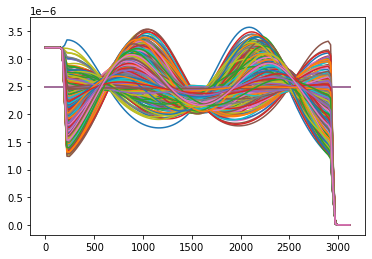

In [16]:
for x in range(787):
  plt.plot(sld_arr[x][0], sld_arr[x][1])
plt.show()

In [17]:
x_val=sld_arr[:,0,:]
x_min = x_val.min()
x_max = x_val.max()
print('x-range = ', x_min, ' to ',x_max)
y_val=sld_arr[:,1,:]
y_min = y_val.min()
y_max = y_val.max()
print('y-range = ', y_min, ' to ',y_max)

x-range =  0.0  to  3119.78
y-range =  8.28593e-16  to  3.56855e-06


In [18]:
#Normalize
sld_arr[:,0,:] = (sld_arr[:,0,:] - x_min)/(x_max - x_min)
sld_arr[:,1,:] = (sld_arr[:,1,:] - y_min)/(y_max - y_min)

In [19]:
sld_arr.max(), sld_arr.min()

(1.0, 0.0)

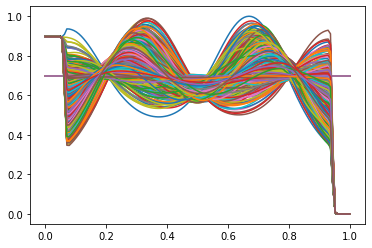

In [20]:
for x in range(786):
  plt.plot(sld_arr[x][0], sld_arr[x][1])
plt.show()

In [21]:
sld_arr.max(), sld_arr.min()

(1.0, 0.0)

In [22]:
temp_params_arr = np.asarray(params_files)
params_arr = temp_params_arr.astype(float)
params_arr.shape

(787, 4)

In [23]:
params_arr

array([[ 0.183  , -0.0163 , -0.193  ,  2.48084],
       [ 0.149  , -0.295  , -0.564  ,  1.2177 ],
       [ 0.142  , -0.402  , -0.0787 ,  3.90488],
       ...,
       [ 0.103  , -0.381  , -0.235  ,  1.99291],
       [ 0.124  , -0.47   , -0.392  ,  1.7463 ],
       [ 0.255  , -0.496  , -0.343  ,  1.59309]])

In [24]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split, Dataset
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [25]:
# np.random.shuffle(sld_arr)

# m=len(sld_arr)
# # print(m-m*0.2)

# ntrain_loader, nval = sld_arr[:int(m-m*0.2),:,:], sld_arr[int(m-m*0.2):,:]
# m = len(nval)//2

# # print(m1)
# nval_loader, ntest_loader = nval[:int(m),:,:], nval[int(m):,:,:]


xtrain_dataset, xrem, ytrain_dataset, yrem = train_test_split(sld_arr,params_arr,train_size=0.8)
xval_dataset, xtest_dataset, yval_dataset, ytest_dataset = train_test_split(xrem,yrem, test_size=0.5)
print(xtrain_dataset.shape, ytrain_dataset.shape, xval_dataset.shape, yval_dataset.shape, xtest_dataset.shape, ytest_dataset.shape)

(629, 2, 128) (629, 4) (79, 2, 128) (79, 4) (79, 2, 128) (79, 4)


In [26]:
batch_size = 50

train_loader = torch.utils.data.DataLoader(torch.tensor(xtrain_dataset[:,np.newaxis,:,:]).float(), batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(torch.tensor(xval_dataset[:,np.newaxis,:,:]).float(), batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(torch.tensor(xtest_dataset[:,np.newaxis,:,:]).float(), batch_size=batch_size)

ytrain_loader = torch.utils.data.DataLoader(torch.tensor(ytrain_dataset).float(), batch_size=batch_size)
yvalid_loader = torch.utils.data.DataLoader(torch.tensor(yval_dataset).float(), batch_size=batch_size)
ytest_loader = torch.utils.data.DataLoader(torch.tensor(ytest_dataset).float(), batch_size=batch_size)

In [27]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [28]:
# !cp /content/gdrive/MyDrive/Pytorch-tools-gdrive/neutron_refl_autoencoder.py .

In [29]:
# import neutron_refl_autoencoder as LA

In [30]:
class LAutoencoder(nn.Module):
    
    def __init__(self,encoded_space_dim,dim1,dim2):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(dim1 * dim2, 500),
            nn.ReLU(True),
            nn.Linear(500, 500),
            nn.ReLU(True),
            nn.Linear(500,encoded_space_dim))
        self.decoder = nn.Sequential(
            nn.Linear(encoded_space_dim, 500),
            nn.ReLU(True),
            nn.Linear(500, 500),
            nn.ReLU(True),
            nn.Linear(500, dim1 * dim2))
        
    def forward(self, x):
            latent = self.encoder(x)
            x = self.decoder(latent)
            return x,latent


In [31]:
### Training function
def train_epoch(model, device, dataloader, loss_fn, optimizer):
    # Set train mode for both the encoder and the decoder
    model.train()
    # decoder.train()
    train_loss = []
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for data in dataloader: # with "_" we just ignore the labels (the second element of the dataloader tuple)
        # Move tensor to the proper device
        img = data
        img = img.view(img.size(0), -1).to(device)  
        # Encode and Decode data
        output,latent = model(img)
        loss = loss_fn(output, img)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print batch loss
        # print('\t train loss per batch: %f' % (loss.data))
        train_loss.append(loss.detach().cpu().numpy())

    return np.mean(train_loss)

In [32]:
### Testing function
def test_epoch(model, device, dataloader, loss_fn):
    # Set evaluation mode for encoder and decoder
    model.eval()
    # decoder.eval()
    with torch.no_grad(): # No need to track the gradients
        # Define the lists to store the outputs for each batch
        conc_out = []
        conc_label = []
        for  data in dataloader:
            img = data
            img = img.view(img.size(0), -1).to(device) 
            # Encode and Decode data
            output, latent = model(img)
            # Append the network output and the original image to the lists
            conc_out.append(output.cpu())
            conc_label.append(img.cpu())
        # Create a single tensor with all the values in the lists
        conc_out = torch.cat(conc_out)
        conc_label = torch.cat(conc_label) 
        # Evaluate global loss
        val_loss = loss_fn(conc_out, conc_label)
    return val_loss.data

In [33]:
def plot_ae_outputs(model,dataset,device,n=10):
    torch_dataset = torch.tensor(dataset[:,np.newaxis,:,:]).float()
    plt.figure(figsize=(26,5.5))
    # targets = test_dataset.targets.numpy()
    # t_idx = {i:np.where(targets==i)[0][0] for i in range(n)}
    for i in range(10):
      ax = plt.subplot(2,n,i+1)
      img = torch_dataset[i]
      # print(img.shape)
      img = img.view(img.size(0), -1).to(device) 
      # print(img.shape)
      model.eval().to(device)
      with torch.no_grad():
         rec_img,_  = model(img)
        #  print("pepe",img.shape,rec_img.shape)
      # plt.plot(img.cpu().reshape(28,28).numpy(), cmap='gist_gray')
      plt.plot(img.cpu().reshape(2,128).numpy()[0],img.cpu().reshape(2,128).numpy()[1])
      # ax.get_xaxis().set_visible(False)
      # ax.get_yaxis().set_visible(False)  
      if i == n//2:
        ax.set_title('Original images')
      ax = plt.subplot(2, n, i + 1 + n)
      # plt.imshow(rec_img.cpu().reshape(28,28).numpy(), cmap='gist_gray')  
      plt.plot(rec_img.cpu().reshape(2,128).numpy()[0],rec_img.cpu().reshape(2,128).numpy()[1])
      # ax.get_xaxis().set_visible(False)
      # ax.get_yaxis().set_visible(False)  
      if i == n//2:
         ax.set_title('Reconstructed images')
    plt.show()  

In [34]:
### Define the loss function
loss_fn = torch.nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
lr= 0.001

### Set the random seed for reproducible results
torch.manual_seed(0)

### Initialize the two networks
d = 3
in_d1 = 2
in_d2 = 128

#model = Autoencoder(encoded_space_dim=encoded_space_dim)
model = LAutoencoder(encoded_space_dim=d,dim1=in_d1,dim2=in_d2)
params_to_optimize = [
    {'params': model.parameters()}
]

optim = torch.optim.Adam(params_to_optimize, lr=lr, weight_decay=1e-05)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')
# Move both the encoder and the decoder to the selected device
model.to(device)

Selected device: cpu


LAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=256, out_features=500, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=500, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=500, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=500, out_features=256, bias=True)
  )
)

EPOCH 1/10 	 train loss 0.10656041651964188 	 val loss 0.016981057822704315


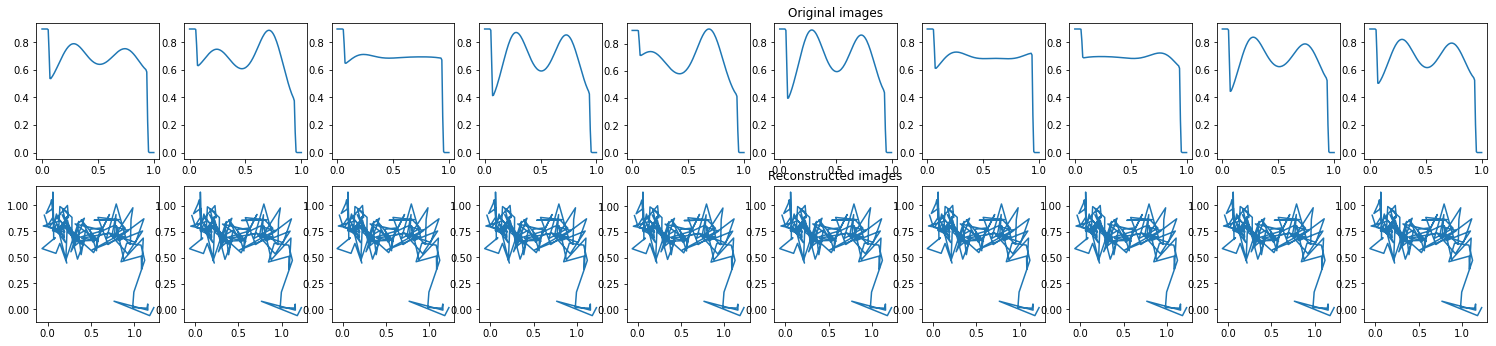

EPOCH 2/10 	 train loss 0.0064840298146009445 	 val loss 0.0038105682469904423


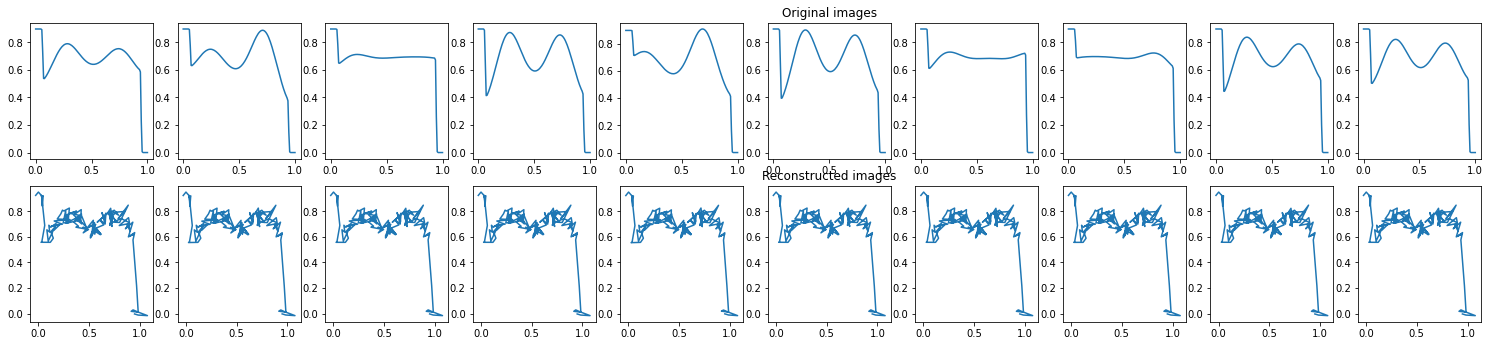

EPOCH 3/10 	 train loss 0.00237735896371305 	 val loss 0.0022527563851326704


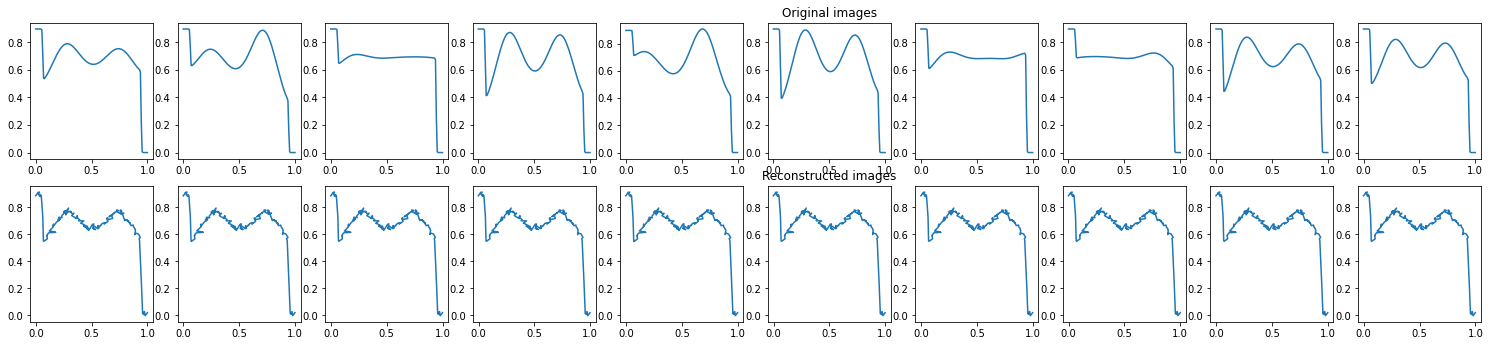

EPOCH 4/10 	 train loss 0.0016982493689283729 	 val loss 0.0021170959807932377


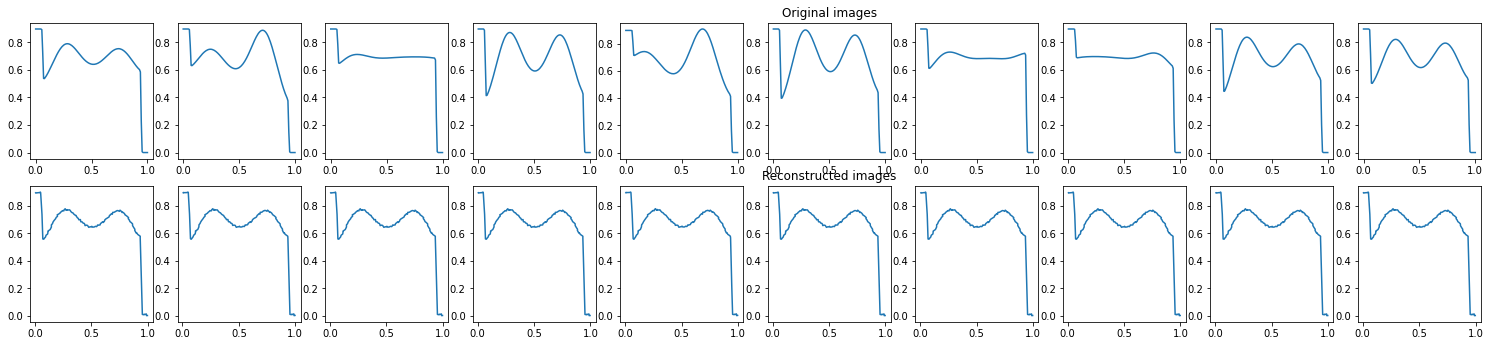

EPOCH 5/10 	 train loss 0.0016422005137428641 	 val loss 0.0021086717024445534


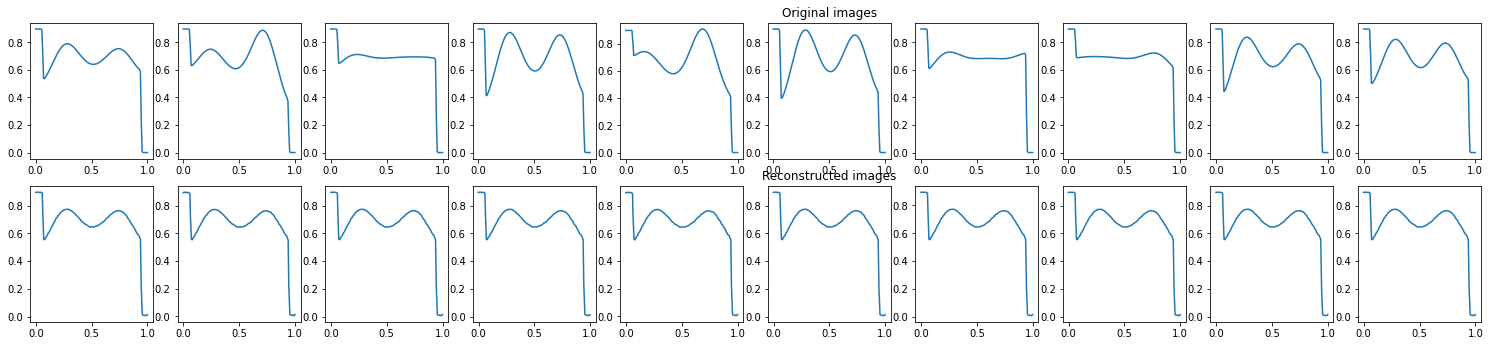

EPOCH 6/10 	 train loss 0.0016409731470048428 	 val loss 0.0021067806519567966


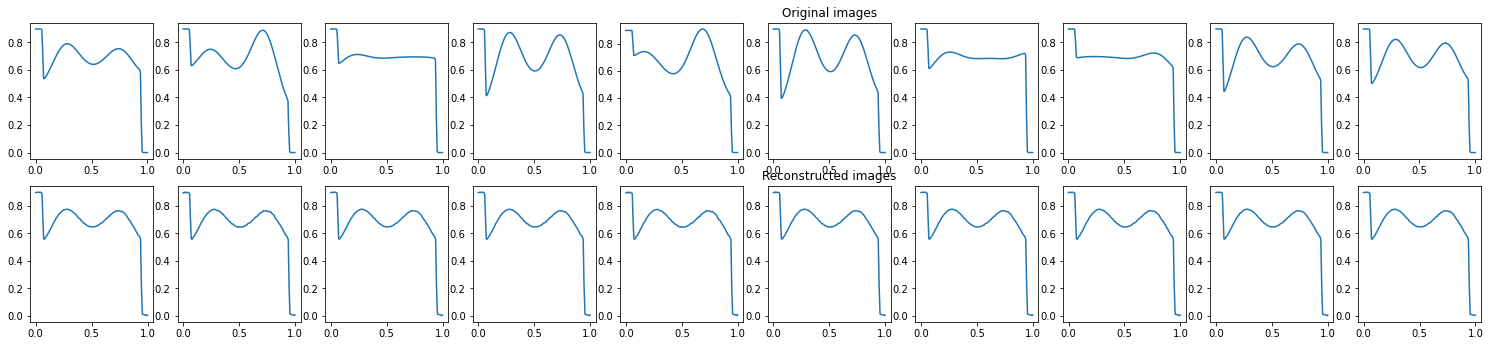

EPOCH 7/10 	 train loss 0.0016446193912997842 	 val loss 0.002116064541041851


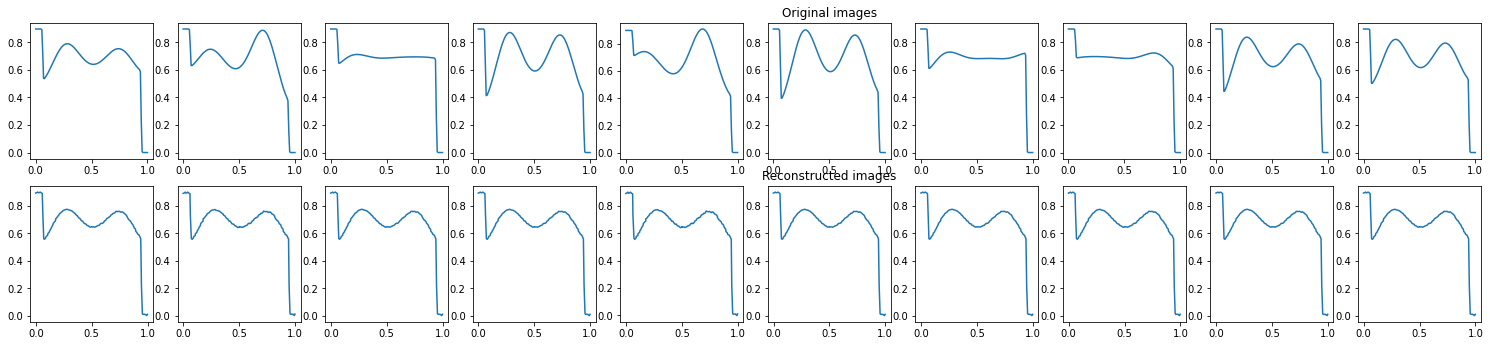

EPOCH 8/10 	 train loss 0.0016455544391646981 	 val loss 0.002092519076541066


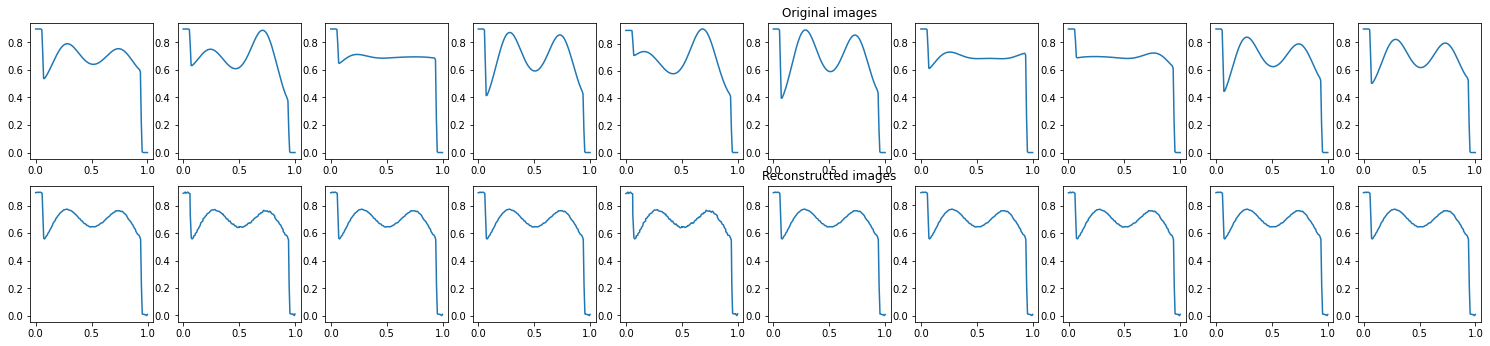

EPOCH 9/10 	 train loss 0.001624964876100421 	 val loss 0.002047374378889799


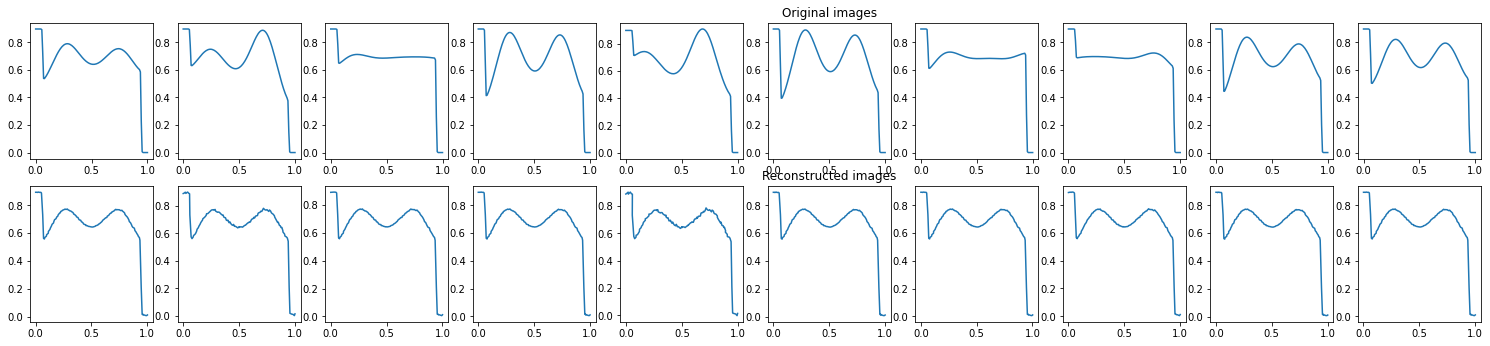

EPOCH 10/10 	 train loss 0.0015660765348002315 	 val loss 0.0019303739536553621


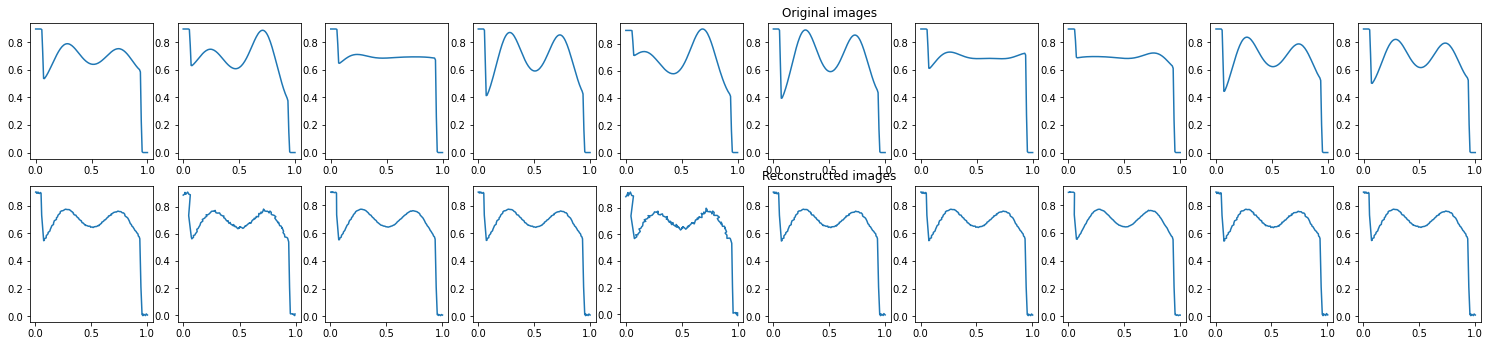

In [35]:
num_epochs = 10
diz_loss = {'train_loss':[],'val_loss':[]}
for epoch in range(num_epochs):
  # print (epoch)
  train_loss = train_epoch(model,device,train_loader,loss_fn,optim)
  val_loss = test_epoch(model,device,valid_loader,loss_fn)
  print('EPOCH {}/{} \t train loss {} \t val loss {}'.format(epoch + 1, num_epochs,train_loss,val_loss))
  diz_loss['train_loss'].append(train_loss)
  diz_loss['val_loss'].append(val_loss)
  plot_ae_outputs(model,xtrain_dataset,device,n=10)

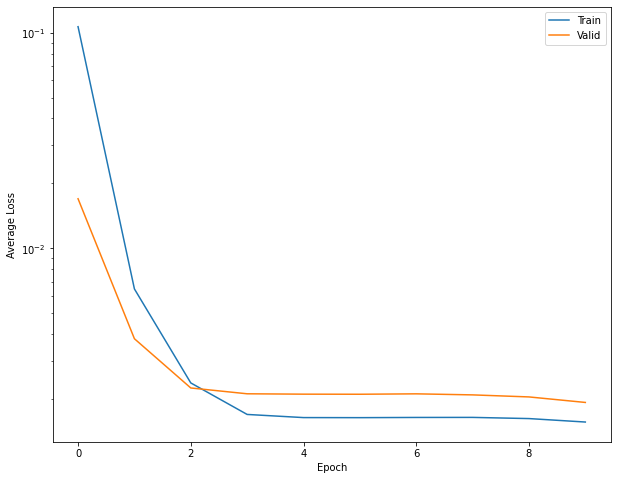

In [36]:
# Plot losses
plt.figure(figsize=(10,8))
plt.semilogy(diz_loss['train_loss'], label='Train')
plt.semilogy(diz_loss['val_loss'], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
#plt.grid()
plt.legend()
#plt.title('loss')
plt.show()

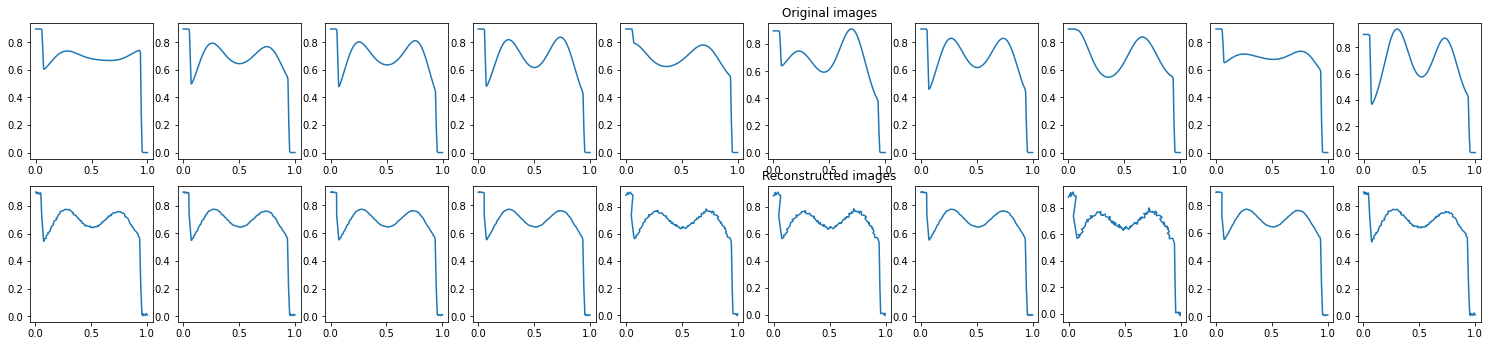

In [37]:
plot_ae_outputs(model,xtest_dataset,device,n=10)

In [38]:
def plot_ae_outputs(model,dataset,device,n=10):
    torch_dataset = torch.tensor(dataset[:,np.newaxis,:,:]).float()
    plt.figure(figsize=(26,5.5))
    # targets = test_dataset.targets.numpy()
    # t_idx = {i:np.where(targets==i)[0][0] for i in range(n)}
    for i in range(10):
      ax = plt.subplot(2,n,i+1)
      img = torch_dataset[i]
      # print(img.shape)
      img = img.view(img.size(0), -1).to(device) 
      # print(img.shape)
      model.eval().to(device)
      with torch.no_grad():
         rec_img,_  = model(img)
        #  print("pepe",img.shape,rec_img.shape)
      # plt.plot(img.cpu().reshape(28,28).numpy(), cmap='gist_gray')
      plt.plot(img.cpu().reshape(2,128).numpy()[0],img.cpu().reshape(2,128).numpy()[1])
      # ax.get_xaxis().set_visible(False)
      # ax.get_yaxis().set_visible(False)  
      if i == n//2:
        ax.set_title('Original images')
      ax = plt.subplot(2, n, i + 1 + n)
      # plt.imshow(rec_img.cpu().reshape(28,28).numpy(), cmap='gist_gray')  
      plt.plot(rec_img.cpu().reshape(2,128).numpy()[0],rec_img.cpu().reshape(2,128).numpy()[1])
      # ax.get_xaxis().set_visible(False)
      # ax.get_yaxis().set_visible(False)  
      if i == n//2:
         ax.set_title('Reconstructed images')
    plt.show()  

In [39]:
#INSERTED BY MIKO
import torch
from torch.utils.data import DataLoader,random_split, Dataset

batch_size = 1
train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(xtrain_dataset).float(), torch.from_numpy(ytrain_dataset).float())
train_loader2 = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [60]:
#INSERT BY MIKO COPIED FROM BELOW
### Get latent
def get_latent(model, device, dataloader):
    # Set evaluation mode for encoder and decoder
    model.eval()
    # decoder.eval()
    with torch.no_grad(): # No need to track the gradients
        # Define the lists to store the outputs for each batch
        conc_img = []
        conc_recimg = []
        conc_latent = []
        
        latent_spaces = []
        y_train_data = []
        for data,ytr in dataloader:
            img = data
            img = img.view(img.size(0), -1).to(device)
            # Encode and Decode data
            output, latent = model(img)
            # Append the network output and the original image to the lists
            conc_img.append(img.cpu())
            conc_recimg.append(output.cpu())
            conc_latent.append(latent.cpu())

            latent = latent.squeeze()
            ytr = ytr.squeeze()

            latent_spaces.append(latent.cpu())
            y_train_data.append(ytr) 
        # Create a single tensor with all the values in the lists
        #conc_img = torch.cat(conc_img)
        #conc_recimg = torch.cat(conc_recimg)
        #conc_latent = torch.cat(conc_latent) 
        # Evaluate global loss
        # val_loss = loss_fn(conc_out, conc_label)
    return latent_spaces, y_train_data


In [62]:
#INSERTED BY MIKO
latent_list, y_var_list = get_latent(model,device,train_loader2)
  
#for x in latent_list
#print(len(latent_list), len(y_var_list))
#print(latent_list[0].squeeze())

b = latent_list[0]
y = y_var_list[0]
#print(b.reshape(1,3))
#a = b.reshape(-1).squeeze()
#print(a.shape)
#print(b.shape)
print(y.shape)

staced_tens = torch.stack(latent_list)
staced_tens2 = torch.stack(y_var_list)
print(staced_tens2.shape)

#latent_tens = torch.as_tensor(latent_list);
#latent_list to numpy array
#look into detach

#latent_tens = 




torch.Size([4])
torch.Size([629, 4])


In [42]:
### Testing function
def test_latent(model, device, dataloader):
    # Set evaluation mode for encoder and decoder
    model.eval()
    # decoder.eval()
    with torch.no_grad(): # No need to track the gradients
        # Define the lists to store the outputs for each batch
        conc_img = []
        conc_recimg = []
        conc_latent = []
        for  data in dataloader:
            img = data
            img = img.view(img.size(0), -1).to(device) 
            # Encode and Decode data
            output, latent = model(img)
            # Append the network output and the original image to the lists
            conc_img.append(img.cpu())
            conc_recimg.append(output.cpu())
            conc_latent.append(latent.cpu())
        # Create a single tensor with all the values in the lists
        conc_img = torch.cat(conc_img)
        conc_recimg = torch.cat(conc_recimg)
        conc_latent = torch.cat(conc_latent) 
        # Evaluate global loss
        # val_loss = loss_fn(conc_out, conc_label)
    return conc_img, conc_recimg, conc_latent

In [43]:
in_img, out_img, latent_var = test_latent(model,device,train_loader)
print(in_img.shape, out_img.shape, latent_var.shape)

torch.Size([629, 256]) torch.Size([629, 256]) torch.Size([629, 3])


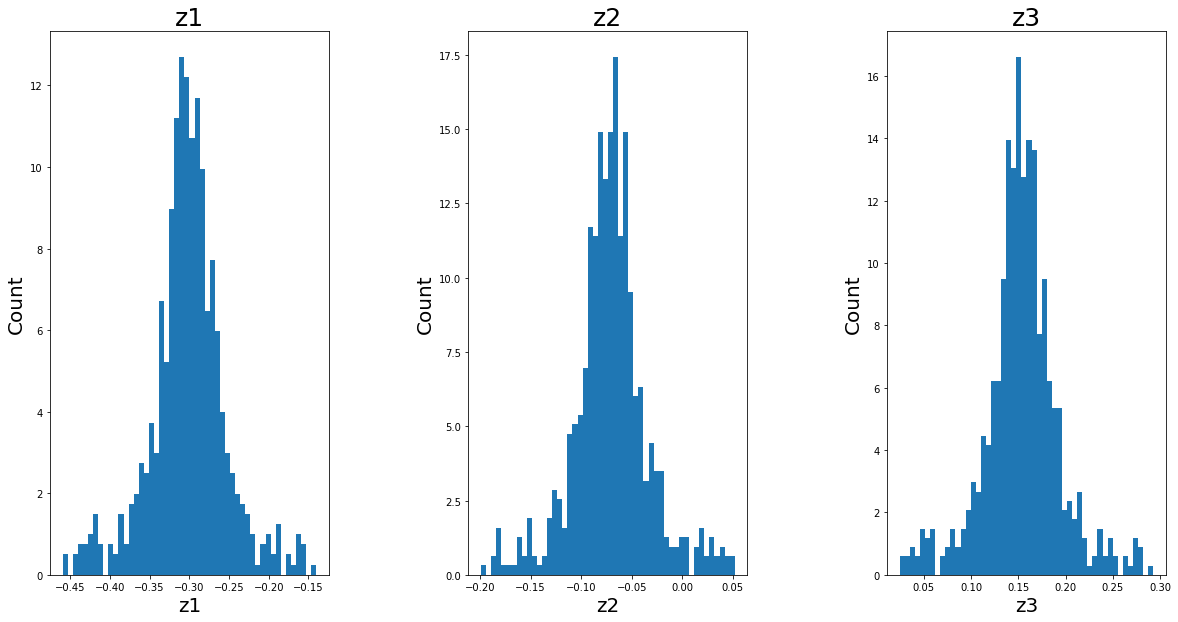

In [44]:
a_t = ['z1','z2','z3']

rows = 1
cols = 3
n=3

#L1 histograms
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(rows, cols, wspace = 0.5, hspace = 0.5)
for i in range(n):
#Control
    ax = fig.add_subplot(gs[i])
    ax.hist(latent_var[:,i].cpu().numpy(), bins = 50, density = True, stacked = True);
    ax.set_title(a_t[i], fontsize=25) 
    ax.set_xlabel(a_t[i],fontsize=20)
    ax.set_ylabel('Count',fontsize=20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


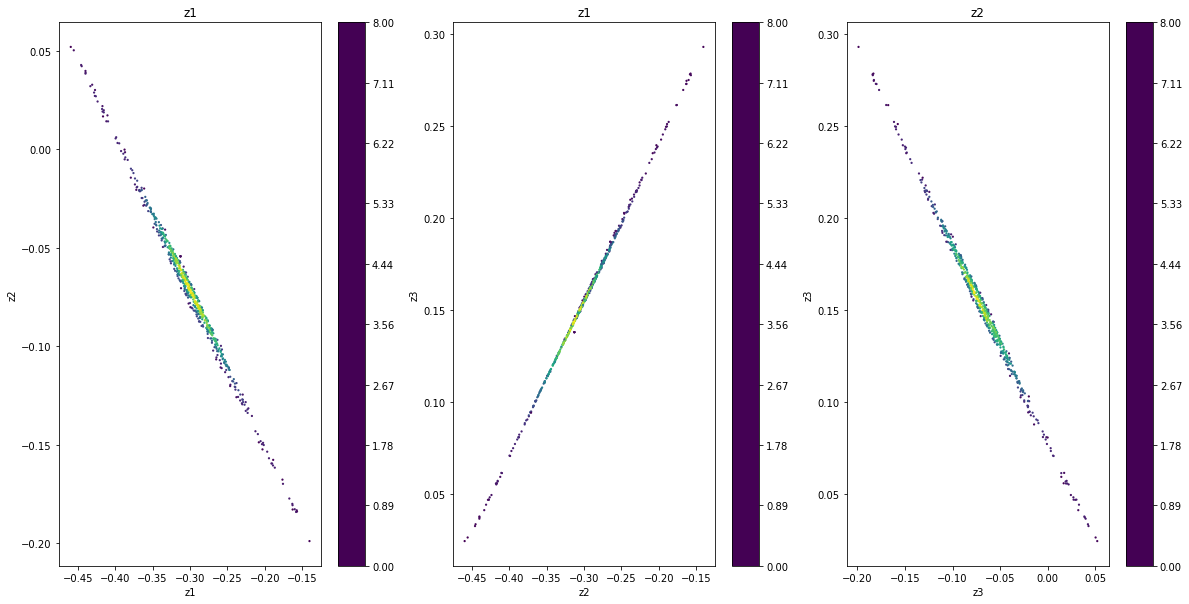

In [45]:
#Plotting the joint distributions for the latent variables

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,3,1)
x = latent_var[:,0].cpu().numpy()
y = latent_var[:,1].cpu().numpy()
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('z1')
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_ylabel('z2')
ax.set_xlabel('z1')
plt.colorbar(sc,boundaries=np.linspace(0,8,10),format='%.2f');


ax = fig.add_subplot(1,3,2)
x = latent_var[:,0].cpu().numpy()
y = latent_var[:,2].cpu().numpy()
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('z1')
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_ylabel('z3')
ax.set_xlabel('z2')
plt.colorbar(sc,boundaries=np.linspace(0,8,10),format='%.2f');


ax = fig.add_subplot(1,3,3)
x = latent_var[:,1].cpu().numpy()
y = latent_var[:,2].cpu().numpy()
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('z2')
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_ylabel('z3')
ax.set_xlabel('z3')
plt.colorbar(sc,boundaries=np.linspace(0,8,10),format='%.2f');

(100, 3)


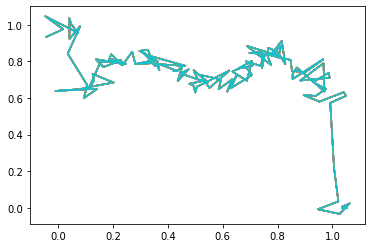

In [46]:
lv2_vals = np.linspace(-1,1,100)

lv1_vals = np.zeros_like(lv2_vals)
lv1_vals = 0.0 + lv1_vals

lv3_vals = np.zeros_like(lv2_vals)
lv3_vals = 0.0 + lv3_vals

lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None], lv3_vals[:, None]), axis=-1)
print(lv_vals.shape)

torch_lv_vals = torch.tensor(lv_vals).float()

out_from_latent = model.decoder(torch_lv_vals)
for x in range(10):
  plt.plot(out_from_latent[i].detach().cpu().reshape(2,128).numpy()[0],out_from_latent[i].detach().cpu().reshape(2,128).numpy()[1])
plt.show()

(100, 3)


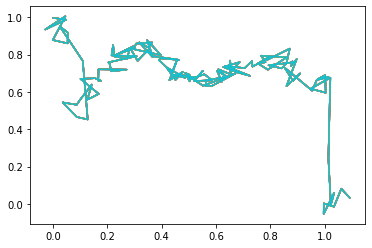

In [47]:
lv1_vals = np.linspace(-1,1,100)

lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0.0 + lv2_vals

lv3_vals = np.zeros_like(lv1_vals)
lv3_vals = 0.0 + lv3_vals

lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None], lv3_vals[:, None]), axis=-1)
print(lv_vals.shape)

torch_lv_vals = torch.tensor(lv_vals).float()

out_from_latent = model.decoder(torch_lv_vals)
for x in range(10):
  plt.plot(out_from_latent[i].detach().cpu().reshape(2,128).numpy()[0],out_from_latent[i].detach().cpu().reshape(2,128).numpy()[1])
plt.show()

(100, 3)


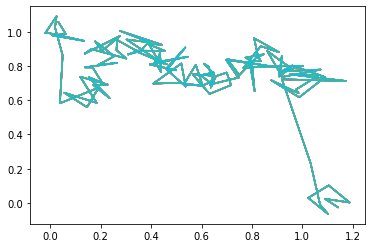

In [48]:
lv3_vals = np.linspace(-1,1,100)

lv2_vals = np.zeros_like(lv3_vals)
lv2_vals = 0.0 + lv2_vals

lv1_vals = np.zeros_like(lv3_vals)
lv1_vals = 0.0 + lv1_vals

lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None], lv3_vals[:, None]), axis=-1)
print(lv_vals.shape)

torch_lv_vals = torch.tensor(lv_vals).float()

out_from_latent = model.decoder(torch_lv_vals)
for x in range(10):
  plt.plot(out_from_latent[i].detach().cpu().reshape(2,128).numpy()[0],out_from_latent[i].detach().cpu().reshape(2,128).numpy()[1])
plt.show()

In [49]:
# a_t = ['z1','z2','z3']

# rows = 1
# cols = 10
# n=10

# fig = plt.figure(figsize=(15,5))
# gs = gridspec.GridSpec(rows, cols, wspace = 1, hspace = 1)
# for i in range(n):
#     ax = fig.add_subplot(gs[i])
#     ax.plot(out_from_latent[i].detach().cpu().reshape(2,128).numpy()[0],out_from_latent[i].detach().cpu().reshape(2,128).numpy()[1]);
#     # ax.set_title(a_t[i], fontsize=25) 
#     # ax.set_xlabel(a_t[i],fontsize=20)
#     # ax.set_ylabel('Count',fontsize=20)

In [50]:
# for x in range(10):
#   plt.plot(out_from_latent[i].detach().cpu().reshape(2,128).numpy()[0],out_from_latent[i].detach().cpu().reshape(2,128).numpy()[1])
# plt.show()